In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from diagnostics.inventory import ModelInventoryBuilder, QueryBuilder

In [2]:
# load a parquet file for mirror mouse
sns.set_style('white')
dataset_name = "mirror-mouse"
filename = "mirror-mouse_video_preds.pqt"
df_save_path = f"/home/jovyan/results/{dataset_name}/{filename}"
assert os.path.exists(df_save_path), f"File {df_save_path} does not exist"


In [3]:
df_video_preds = pd.read_parquet(df_save_path) # load the parquet file

In [4]:
df_video_preds.head()

bodyparts paw1LH_top                         paw2LF_top              \
coords             x           y likelihood           x           y   
0          50.480515  123.885651   0.999732  290.451141  101.216125   
1          50.480515  123.885651   0.999732  290.451141  101.216125   
2          50.480515  123.885651   0.999732  290.451141  101.216125   
3          48.359268  124.993523   0.999068  286.675964   99.951584   
4          45.890339  126.397385   0.999974  285.511505   99.690117   

bodyparts             paw3RF_top                        paw4RH_top  ...  \
coords    likelihood           x          y likelihood           x  ...   
0           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
1           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
2           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
3           0.998523  214.889603  99.367928   0.999926  199.066422  ...   
4           0.999808  211.948364  98.404236   0.999585  197.536942  ...   

bodyparts obsHigh_bot             obsLow_bot                         \
coords              y likelihood           x           y likelihood   
0           62.536953   0.000044  388.939697  395.356445   0.999741   
1           62.536953   0.000044  388.939697  395.356445   0.999741   
2           62.536953   0.000044  388.939697  395.356445   0.999741   
3           77.669098   0.000061  388.876190  395.148682   0.999787   
4           73.861153   0.000060  388.868164  395.245758   0.999582   

bodyparts         video_name  \
coords                         
0          180623_000_0_2000   
1          180623_000_0_2000   
2          180623_000_0_2000   
3          180623_000_0_2000   
4          180623_000_0_2000   

bodyparts                                         model_path rng_seed_data_pt  \
coords                                                                          
0          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
1          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
2          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
3          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
4          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   

bodyparts train_frames          model_type  
coords                                      
0                    1  semi-super context  
1                    1  semi-super context  
2                    1  semi-super context  
3                    1  semi-super context  
4                    1  semi-super context  

[5 rows x 56 columns]

In [5]:
df_video_preds[("paw1LH_bot","x")]

0        58.820816
1        58.820816
2        58.820816
3        54.980995
4        52.799305
           ...    
26995    97.109421
26996    94.200607
26997    90.714699
26998    88.061333
26999    87.285065
Name: (paw1LH_bot, x), Length: 1600000, dtype: float64

In [6]:
paw_names = ["paw1LH", "paw2LF", "paw3RF", "paw4RH"]
views = ["top", "bot"]
# loop over paw names, and compute the difference in x coordinate between top and bottom views
for paw_name in paw_names:
    df_video_preds[f"{paw_name}_x_diff"] = df_video_preds[(f"{paw_name}_top","x")] - df_video_preds[(f"{paw_name}_bot","x")]

In [7]:
df_video_preds.head()

bodyparts paw1LH_top                         paw2LF_top              \
coords             x           y likelihood           x           y   
0          50.480515  123.885651   0.999732  290.451141  101.216125   
1          50.480515  123.885651   0.999732  290.451141  101.216125   
2          50.480515  123.885651   0.999732  290.451141  101.216125   
3          48.359268  124.993523   0.999068  286.675964   99.951584   
4          45.890339  126.397385   0.999974  285.511505   99.690117   

bodyparts             paw3RF_top                        paw4RH_top  ...  \
coords    likelihood           x          y likelihood           x  ...   
0           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
1           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
2           0.999850  219.060364  99.936409   0.999953  197.855270  ...   
3           0.998523  214.889603  99.367928   0.999926  199.066422  ...   
4           0.999808  211.948364  98.404236   0.999585  197.536942  ...   

bodyparts obsLow_bot         video_name  \
coords    likelihood                      
0           0.999741  180623_000_0_2000   
1           0.999741  180623_000_0_2000   
2           0.999741  180623_000_0_2000   
3           0.999787  180623_000_0_2000   
4           0.999582  180623_000_0_2000   

bodyparts                                         model_path rng_seed_data_pt  \
coords                                                                          
0          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
1          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
2          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
3          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   
4          /home/jovyan/grid_artifacts/mirror-mouse/stran...                0   

bodyparts train_frames          model_type paw1LH_x_diff paw2LF_x_diff  \
coords                                                                   
0                    1  semi-super context     -8.340302      8.044373   
1                    1  semi-super context     -8.340302      8.044373   
2                    1  semi-super context     -8.340302      8.044373   
3                    1  semi-super context     -6.621727      6.847778   
4                    1  semi-super context     -6.908966      7.646210   

bodyparts paw3RF_x_diff paw4RH_x_diff  
coords                                 
0              5.765167     -2.026566  
1              5.765167     -2.026566  
2              5.765167     -2.026566  
3              3.710526     -0.558273  
4              3.773743      1.197449  

[5 rows x 60 columns]

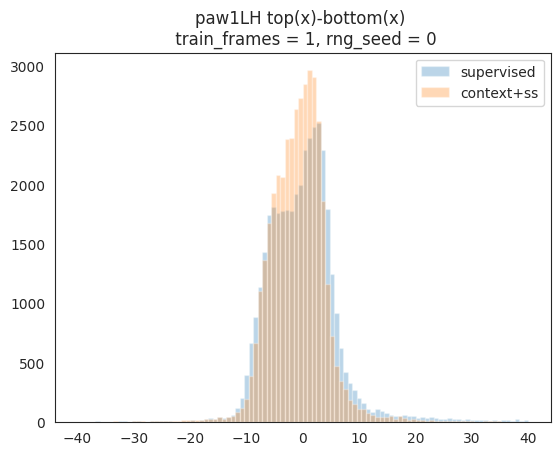

In [23]:
# plot the histogram for supervised model and semi-super context model
range_val = 40
train_frames = "1"
rng = "0"
plt.hist(df_video_preds[(df_video_preds.model_type == "baseline") & (df_video_preds.rng_seed_data_pt == rng) & (df_video_preds.train_frames == train_frames)]["paw1LH_x_diff"], bins=100, range=[-range_val, range_val], alpha=0.3, label="supervised");
plt.hist(df_video_preds[(df_video_preds.model_type == "semi-super context") & (df_video_preds.rng_seed_data_pt == rng) & (df_video_preds.train_frames == train_frames)]["paw1LH_x_diff"], bins=100, range=[-range_val, range_val], alpha=0.3, label="context+ss");
#plt.hist(df_video_preds[df_video_preds.model_type == "semi-super context"].paw1LH_x_diff, bins=50, range=[-range_val, range_val], alpha=0.5, label="context");
plt.legend();
plt.title("paw1LH top(x)-bottom(x) \n train_frames = %s, rng_seed = %s" % (train_frames, rng));

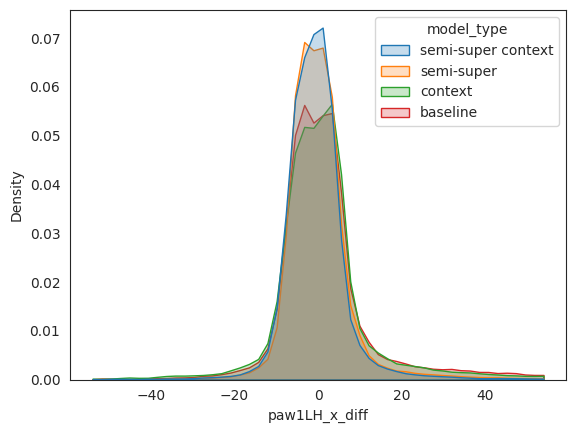

In [38]:
range_val = 55
sns.histplot(data = df_video_preds[df_video_preds["train_frames"] == "75"], x = "paw1LH_x_diff", hue = "model_type", bins = 50, element="poly", binrange = [-range_val, range_val], multiple = "layer", stat = "density", common_norm = False, alpha = 0.25);